In [8]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout,execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [10]:
random_runs = [
    'kobybibas/pnml_for_active_learning/3nc3n8a3',
    'kobybibas/pnml_for_active_learning/131bwfu2',
    'kobybibas/pnml_for_active_learning/2ohb43jt',
    'kobybibas/pnml_for_active_learning/2975rh6s',
    'kobybibas/pnml_for_active_learning/32mfxc81',
    'kobybibas/pnml_for_active_learning/9mexzbcu'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/k17fre6d',
    'kobybibas/pnml_for_active_learning/euqwcz6s',
    'kobybibas/pnml_for_active_learning/1ylztlce',
    'kobybibas/pnml_for_active_learning/3bh0tlcm',
    'kobybibas/pnml_for_active_learning/3ompobye',
    'kobybibas/pnml_for_active_learning/2n7jwxic'
]
pnml_runs = [
    'kobybibas/pnml_for_active_learning/2errapxe',
    'kobybibas/pnml_for_active_learning/h79c694h',
    'kobybibas/pnml_for_active_learning/cumcwe1e',
    'kobybibas/pnml_for_active_learning/384vr9bn',
    'kobybibas/pnml_for_active_learning/2yopyl79',
    'kobybibas/pnml_for_active_learning/kfw7xxcp'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/3nc3n8a3
kobybibas/pnml_for_active_learning/131bwfu2
kobybibas/pnml_for_active_learning/2ohb43jt
kobybibas/pnml_for_active_learning/2975rh6s
kobybibas/pnml_for_active_learning/32mfxc81
kobybibas/pnml_for_active_learning/9mexzbcu
kobybibas/pnml_for_active_learning/k17fre6d
kobybibas/pnml_for_active_learning/euqwcz6s
kobybibas/pnml_for_active_learning/1ylztlce
kobybibas/pnml_for_active_learning/3bh0tlcm
kobybibas/pnml_for_active_learning/3ompobye
kobybibas/pnml_for_active_learning/2n7jwxic
kobybibas/pnml_for_active_learning/2errapxe
kobybibas/pnml_for_active_learning/h79c694h
kobybibas/pnml_for_active_learning/cumcwe1e
kobybibas/pnml_for_active_learning/384vr9bn
kobybibas/pnml_for_active_learning/2yopyl79
kobybibas/pnml_for_active_learning/kfw7xxcp


In [11]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)
plot_list = [(random_res, "Random"), (bald_res, "Bald"),(pnml_res, "pNML")]


In [14]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

91.71597633136095
training_set_size_left     310.000000
test_acc_left                0.559930
test_acc_round               0.560000
training_set_size_right    338.000000
test_acc_right               0.559608
Name: 261, dtype: float64


EMNIST


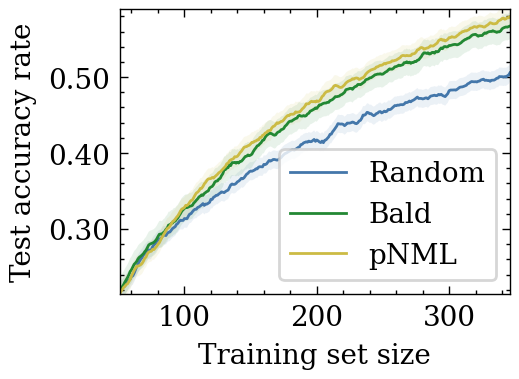

In [13]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(4*0.7, 3*0.7))
fig,ax = execute_plot(plot_list,fig,ax)
print("EMNIST")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist.pdf"))
plt.show()